In [1]:
import sqlite3
import sqlalchemy as db
from sqlalchemy.orm import Session
import matplotlib as plt
from collections import Counter
import operator

import matplotlib.pyplot as plt

In [167]:
engine = db.create_engine('sqlite:///flights.sqlite3', echo=True)     #relative directory (in same folder as this notebook so no directory)
connection = engine.connect()
flights = db.Table('ontime', db.MetaData(), autoload=True, autoload_with=engine)
session = Session(bind=engine)
cols = flights.columns

2019-12-02 13:26:58,387 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-12-02 13:26:58,390 INFO sqlalchemy.engine.base.Engine ()
2019-12-02 13:26:58,394 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-12-02 13:26:58,395 INFO sqlalchemy.engine.base.Engine ()
2019-12-02 13:26:58,429 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("ontime")
2019-12-02 13:26:58,430 INFO sqlalchemy.engine.base.Engine ()
2019-12-02 13:26:58,444 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'ontime' AND type = 'table'
2019-12-02 13:26:58,447 INFO sqlalchemy.engine.base.Engine ()
2019-12-02 13:26:58,450 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("ontime")
2019-12-02 13:26:58,451 INFO sqlalchemy.engine.base.Engine ()
2019-12-02 13:26:58,452 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SEL

In [3]:
insp = db.engine.reflection.Inspector.from_engine(engine)
for name in insp.get_table_names():
    for index in insp.get_indexes(name):
        print(index)

2019-11-26 16:41:45,117 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-11-26 16:41:45,119 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 16:41:45,125 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("ontime")
2019-11-26 16:41:45,128 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 16:41:45,132 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("dest")
2019-11-26 16:41:45,136 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 16:41:45,137 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("origin")
2019-11-26 16:41:45,139 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 16:41:45,141 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("date")
2019-11-26 16:41:45,143 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 16:41:45,145 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("year")
2019-11-26 16:41:45,146 INFO sqlalchemy.engine.base.Engine ()
{'name': 'dest', 'column_names': ['Dest'], 'unique': 0}
{'name': 'origin', '

In [4]:
def daily_delays_and_flights08(timeDelay): 
    total_flights = []
    total_delays = []
    for month in range(1, 13):
        if month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:
            for day in range(1, 32):
                total_delays.append(int(session.query(db.func.count(flights)).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.DayofMonth.cast(db.Integer) == day, cols.Month.cast(db.Integer) == month, cols.Year.cast(db.Integer) == 2008).scalar()))
                total_flights.append(int(session.query(db.func.count(flights)).filter(cols.DayofMonth.cast(db.Integer) == day, cols.Month.cast(db.Integer) == month, cols.Year.cast(db.Integer) == 2008).scalar()))
        elif month == 4 or month == 6 or month == 9 or month == 11:
            for day in range(1, 31):
                total_delays.append(int(session.query(db.func.count(flights)).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.DayofMonth.cast(db.Integer) == day, cols.Month.cast(db.Integer) == month, cols.Year.cast(db.Integer) == 2008).scalar()))
                total_flights.append(int(session.query(db.func.count(flights)).filter(cols.DayofMonth.cast(db.Integer) == day, cols.Month.cast(db.Integer) == month, cols.Year.cast(db.Integer) == 2008).scalar()))
        elif month == 2:
            for day in range(1, 30):
                total_delays.append(int(session.query(db.func.count(flights)).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.DayofMonth.cast(db.Integer) == day, cols.Month.cast(db.Integer) == month, cols.Year.cast(db.Integer) == 2008).scalar()))
                total_flights.append(int(session.query(db.func.count(flights)).filter(cols.DayofMonth.cast(db.Integer) == day, cols.Month.cast(db.Integer) == month, cols.Year.cast(db.Integer) == 2008).scalar()))
    return total_delays, total_flights



In [5]:
x_1, y_1 = daily_delays_and_flights08(60)

2019-11-26 16:41:45,176 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2019-11-26 16:41:45,177 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 16:41:45,178 INFO sqlalchemy.engine.base.Engine (60, 1, 1, 2008)
2019-11-26 16:42:07,956 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 16:42:07,959 INFO sqlalchemy.engine.base.Engine (1, 1, 2008)
2019-11-26 16:42:14,547 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 16

2019-11-26 16:48:00,158 INFO sqlalchemy.engine.base.Engine (13, 1, 2008)
2019-11-26 16:48:06,415 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 16:48:06,416 INFO sqlalchemy.engine.base.Engine (60, 14, 1, 2008)
2019-11-26 16:48:30,146 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 16:48:30,146 INFO sqlalchemy.engine.base.Engine (14, 1, 2008)
2019-11-26 16:48:36,356 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 16:

2019-11-26 16:54:12,090 INFO sqlalchemy.engine.base.Engine (26, 1, 2008)
2019-11-26 16:54:18,491 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 16:54:18,491 INFO sqlalchemy.engine.base.Engine (60, 27, 1, 2008)
2019-11-26 16:54:40,942 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 16:54:40,943 INFO sqlalchemy.engine.base.Engine (27, 1, 2008)
2019-11-26 16:54:47,325 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 16:

2019-11-26 17:00:19,896 INFO sqlalchemy.engine.base.Engine (8, 2, 2008)
2019-11-26 17:00:26,333 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:00:26,334 INFO sqlalchemy.engine.base.Engine (60, 9, 2, 2008)
2019-11-26 17:00:48,748 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:00:48,749 INFO sqlalchemy.engine.base.Engine (9, 2, 2008)
2019-11-26 17:00:55,103 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:00:

2019-11-26 17:06:22,297 INFO sqlalchemy.engine.base.Engine (21, 2, 2008)
2019-11-26 17:06:28,366 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:06:28,367 INFO sqlalchemy.engine.base.Engine (60, 22, 2, 2008)
2019-11-26 17:06:49,844 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:06:49,844 INFO sqlalchemy.engine.base.Engine (22, 2, 2008)
2019-11-26 17:06:55,944 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:

2019-11-26 17:12:32,460 INFO sqlalchemy.engine.base.Engine (5, 3, 2008)
2019-11-26 17:12:39,170 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:12:39,172 INFO sqlalchemy.engine.base.Engine (60, 6, 3, 2008)
2019-11-26 17:13:01,252 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:13:01,253 INFO sqlalchemy.engine.base.Engine (6, 3, 2008)
2019-11-26 17:13:07,415 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:13:

2019-11-26 17:18:51,712 INFO sqlalchemy.engine.base.Engine (18, 3, 2008)
2019-11-26 17:18:58,401 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:18:58,401 INFO sqlalchemy.engine.base.Engine (60, 19, 3, 2008)
2019-11-26 17:19:21,666 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:19:21,667 INFO sqlalchemy.engine.base.Engine (19, 3, 2008)
2019-11-26 17:19:28,323 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:

2019-11-26 17:24:58,218 INFO sqlalchemy.engine.base.Engine (31, 3, 2008)
2019-11-26 17:25:04,503 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:25:04,504 INFO sqlalchemy.engine.base.Engine (60, 1, 4, 2008)
2019-11-26 17:25:25,634 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:25:25,634 INFO sqlalchemy.engine.base.Engine (1, 4, 2008)
2019-11-26 17:25:34,381 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:25

2019-11-26 17:31:10,620 INFO sqlalchemy.engine.base.Engine (13, 4, 2008)
2019-11-26 17:31:16,790 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:31:16,790 INFO sqlalchemy.engine.base.Engine (60, 14, 4, 2008)
2019-11-26 17:31:39,104 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:31:39,105 INFO sqlalchemy.engine.base.Engine (14, 4, 2008)
2019-11-26 17:31:45,440 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:

2019-11-26 17:37:22,327 INFO sqlalchemy.engine.base.Engine (26, 4, 2008)
2019-11-26 17:37:28,344 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:37:28,345 INFO sqlalchemy.engine.base.Engine (60, 27, 4, 2008)
2019-11-26 17:37:49,952 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:37:49,952 INFO sqlalchemy.engine.base.Engine (27, 4, 2008)
2019-11-26 17:37:56,350 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:

2019-11-26 17:43:31,354 INFO sqlalchemy.engine.base.Engine (9, 5, 2008)
2019-11-26 17:43:37,660 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:43:37,661 INFO sqlalchemy.engine.base.Engine (60, 10, 5, 2008)
2019-11-26 17:44:00,614 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:44:00,615 INFO sqlalchemy.engine.base.Engine (10, 5, 2008)
2019-11-26 17:44:06,782 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:4

2019-11-26 17:49:57,493 INFO sqlalchemy.engine.base.Engine (22, 5, 2008)
2019-11-26 17:50:04,157 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:50:04,158 INFO sqlalchemy.engine.base.Engine (60, 23, 5, 2008)
2019-11-26 17:50:28,817 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:50:28,818 INFO sqlalchemy.engine.base.Engine (23, 5, 2008)
2019-11-26 17:50:35,689 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:

2019-11-26 17:56:29,253 INFO sqlalchemy.engine.base.Engine (4, 6, 2008)
2019-11-26 17:56:35,895 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:56:35,896 INFO sqlalchemy.engine.base.Engine (60, 5, 6, 2008)
2019-11-26 17:57:00,884 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:57:00,885 INFO sqlalchemy.engine.base.Engine (5, 6, 2008)
2019-11-26 17:57:07,556 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:57:

2019-11-26 18:02:54,712 INFO sqlalchemy.engine.base.Engine (17, 6, 2008)
2019-11-26 18:03:00,903 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:03:00,904 INFO sqlalchemy.engine.base.Engine (60, 18, 6, 2008)
2019-11-26 18:03:22,938 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:03:22,939 INFO sqlalchemy.engine.base.Engine (18, 6, 2008)
2019-11-26 18:03:29,310 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:

2019-11-26 18:09:25,390 INFO sqlalchemy.engine.base.Engine (30, 6, 2008)
2019-11-26 18:09:31,646 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:09:31,647 INFO sqlalchemy.engine.base.Engine (60, 1, 7, 2008)
2019-11-26 18:09:53,225 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:09:53,226 INFO sqlalchemy.engine.base.Engine (1, 7, 2008)
2019-11-26 18:09:59,668 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:09

2019-11-26 18:15:38,221 INFO sqlalchemy.engine.base.Engine (13, 7, 2008)
2019-11-26 18:15:44,733 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:15:44,733 INFO sqlalchemy.engine.base.Engine (60, 14, 7, 2008)
2019-11-26 18:16:06,474 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:16:06,475 INFO sqlalchemy.engine.base.Engine (14, 7, 2008)
2019-11-26 18:16:13,076 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:

2019-11-26 18:21:48,902 INFO sqlalchemy.engine.base.Engine (26, 7, 2008)
2019-11-26 18:21:54,585 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:21:54,586 INFO sqlalchemy.engine.base.Engine (60, 27, 7, 2008)
2019-11-26 18:22:14,585 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:22:14,586 INFO sqlalchemy.engine.base.Engine (27, 7, 2008)
2019-11-26 18:22:20,259 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:

2019-11-26 18:28:00,536 INFO sqlalchemy.engine.base.Engine (8, 8, 2008)
2019-11-26 18:28:06,597 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:28:06,597 INFO sqlalchemy.engine.base.Engine (60, 9, 8, 2008)
2019-11-26 18:28:28,055 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:28:28,057 INFO sqlalchemy.engine.base.Engine (9, 8, 2008)
2019-11-26 18:28:34,172 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:28:

2019-11-26 18:34:22,592 INFO sqlalchemy.engine.base.Engine (21, 8, 2008)
2019-11-26 18:34:28,498 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:34:28,498 INFO sqlalchemy.engine.base.Engine (60, 22, 8, 2008)
2019-11-26 18:34:50,374 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:34:50,375 INFO sqlalchemy.engine.base.Engine (22, 8, 2008)
2019-11-26 18:34:56,623 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:

2019-11-26 18:40:44,083 INFO sqlalchemy.engine.base.Engine (3, 9, 2008)
2019-11-26 18:40:50,300 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:40:50,301 INFO sqlalchemy.engine.base.Engine (60, 4, 9, 2008)
2019-11-26 18:41:13,640 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:41:13,641 INFO sqlalchemy.engine.base.Engine (4, 9, 2008)
2019-11-26 18:41:20,026 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:41:

2019-11-26 18:47:36,277 INFO sqlalchemy.engine.base.Engine (16, 9, 2008)
2019-11-26 18:47:43,514 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:47:43,515 INFO sqlalchemy.engine.base.Engine (60, 17, 9, 2008)
2019-11-26 18:48:10,100 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:48:10,101 INFO sqlalchemy.engine.base.Engine (17, 9, 2008)
2019-11-26 18:48:16,535 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:

2019-11-26 18:54:24,388 INFO sqlalchemy.engine.base.Engine (29, 9, 2008)
2019-11-26 18:54:30,821 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:54:30,822 INFO sqlalchemy.engine.base.Engine (60, 30, 9, 2008)
2019-11-26 18:54:54,864 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:54:54,864 INFO sqlalchemy.engine.base.Engine (30, 9, 2008)
2019-11-26 18:55:01,175 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:

2019-11-26 19:00:57,174 INFO sqlalchemy.engine.base.Engine (12, 10, 2008)
2019-11-26 19:01:03,449 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:01:03,449 INFO sqlalchemy.engine.base.Engine (60, 13, 10, 2008)
2019-11-26 19:01:26,801 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:01:26,801 INFO sqlalchemy.engine.base.Engine (13, 10, 2008)
2019-11-26 19:01:32,925 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 

2019-11-26 19:18:37,170 INFO sqlalchemy.engine.base.Engine (25, 10, 2008)
2019-11-26 19:18:43,468 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:18:43,468 INFO sqlalchemy.engine.base.Engine (60, 26, 10, 2008)
2019-11-26 19:19:06,427 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:19:06,428 INFO sqlalchemy.engine.base.Engine (26, 10, 2008)
2019-11-26 19:19:12,607 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 

2019-11-26 19:25:03,892 INFO sqlalchemy.engine.base.Engine (7, 11, 2008)
2019-11-26 19:25:10,426 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:25:10,427 INFO sqlalchemy.engine.base.Engine (60, 8, 11, 2008)
2019-11-26 19:25:33,425 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:25:33,426 INFO sqlalchemy.engine.base.Engine (8, 11, 2008)
2019-11-26 19:25:39,892 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:

2019-11-26 19:31:30,163 INFO sqlalchemy.engine.base.Engine (20, 11, 2008)
2019-11-26 19:31:36,204 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:31:36,204 INFO sqlalchemy.engine.base.Engine (60, 21, 11, 2008)
2019-11-26 19:31:59,337 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:31:59,338 INFO sqlalchemy.engine.base.Engine (21, 11, 2008)
2019-11-26 19:32:05,750 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 

2019-11-26 19:38:05,584 INFO sqlalchemy.engine.base.Engine (3, 12, 2008)
2019-11-26 19:38:12,438 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:38:12,439 INFO sqlalchemy.engine.base.Engine (60, 4, 12, 2008)
2019-11-26 19:38:35,682 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:38:35,683 INFO sqlalchemy.engine.base.Engine (4, 12, 2008)
2019-11-26 19:38:41,915 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:

2019-11-26 19:44:49,506 INFO sqlalchemy.engine.base.Engine (16, 12, 2008)
2019-11-26 19:44:56,850 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:44:56,850 INFO sqlalchemy.engine.base.Engine (60, 17, 12, 2008)
2019-11-26 19:45:20,951 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:45:20,952 INFO sqlalchemy.engine.base.Engine (17, 12, 2008)
2019-11-26 19:45:27,553 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 

2019-11-26 19:51:04,156 INFO sqlalchemy.engine.base.Engine (29, 12, 2008)
2019-11-26 19:51:10,349 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:51:10,350 INFO sqlalchemy.engine.base.Engine (60, 30, 12, 2008)
2019-11-26 19:51:35,715 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:51:35,715 INFO sqlalchemy.engine.base.Engine (30, 12, 2008)
2019-11-26 19:51:42,142 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 

### Plot total flights vs. total delays (per day)

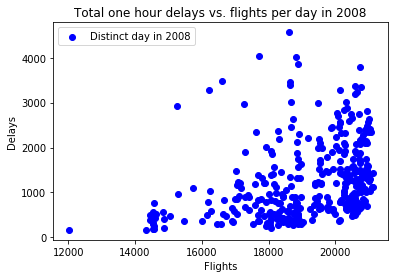

In [154]:
plt.scatter(y_1, x_1, color='b', label="Distinct day in 2008")
plt.title("Total one hour delays vs. flights per day in 2008")
plt.xlabel("Flights")
plt.ylabel("Delays")
plt.legend(loc=0)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [25]:
x = np.array(y_1)
y = np.array(x_1)

In [27]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [47]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
y_pred = regressor.predict(X_test)

### Regression model

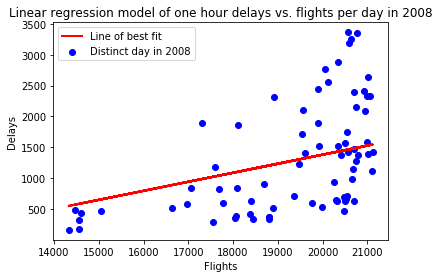

In [155]:
plt.scatter(X_test, y_test,  color='b', label="Distinct day in 2008")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Line of best fit")
plt.title("Linear regression model of one hour delays vs. flights per day in 2008")
plt.xlabel("Flights")
plt.ylabel("Delays")
plt.legend(loc=0)
plt.show()

In [50]:
r2 = metrics.r2_score(y_test, y_pred)

In [51]:
r2

0.2311191185755075

### Compare delays in average week to holiday weeks
#### (weeks are calculated Monday - Sunday, with exception of first and last week)

In [85]:
#calculate delays in average week
#week0
week_total = 0
avgs = []
dayofyear=0
for day in range(6):
    week_total += x_1[day]
    dayofyear += 1
year_total = week_total
avgs.append(week_total/6)
#weeks1 to 50
print(dayofyear)
for _ in range(51):
    week_total = 0
    for day in range(dayofyear, dayofyear+7):
        week_total += x_1[day]
        dayofyear += 1
    year_total += week_total
    avgs.append(week_total/7)
print(dayofyear)
#week 51
week_total = 0
for day in range(363, 366):
    week_total += x_1[day]

avgs.append(week_total/3)

6
363


In [93]:
double_check = avgs[0]*6
for week in range(1, 52):
    double_check += avgs[week]*7
double_check += avgs[52]*3

In [94]:
sum(x_1) == double_check

True

In [96]:
avg_week = np.mean(avgs)
avg_week

1259.1585804132974

In [132]:
xs = ["Jan. 1-6", "7-13", "14-20", "21-27", "Jan. 28 - Feb. 3", "4-10", "11-17", "18-24", "Feb. 25 - Mar. 2", "3-9", "10-16", "17-23", "24-30", "Mar. 31 - Apr. 6", "7-13", "14-20", "21-27", "Apr. 28 - May 4", "5-11", "12-18", "19-25", "May 26 - June 1", "2-8", "9-15", "16-22", "23-29", "June 30 - July 6", "7-13", "14-20", "21-27", "July 28 - Aug. 3", "4-10", "11-17", "18-24", "25-31", "Sept. 1 - 7", "8-14", "15-21", "22-28", "Sept. 29 - Oct. 5", "6-12", "13-19", "20-26", "Oct. 27 - Nov. 2", "3-9", "10-16", "17-23", "24-30", "Dec. 1 - 7", "8-14", "15-21", "22-28", "29-31"]

In [149]:
import matplotlib.patches as mpatches

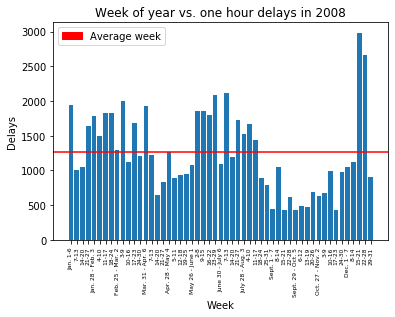

In [156]:
plt.bar(range(len(avgs)), avgs, width=0.8)
plt.xticks(range(len(xs)), xs, rotation=90, fontsize=6)
plt.axhline(y=avg_week, color='r', linestyle='-')
plt.title("Week of year vs. one hour delays in 2008")
plt.xlabel("Week")
plt.ylabel("Delays")
red_patch = mpatches.Patch(color='red', label='Average week', linestyle="-")
plt.legend(handles=[red_patch])
plt.show()

In [165]:
def airline_daily_delays_and_flights08(timeDelay, airline): 
    total_flights = []
    total_delays = []
    for month in range(1, 13):
        if month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:
            for day in range(1, 32):
                total_delays.append(len(session.query(cols.UniqueCarrier).filter(cols.UniqueCarrier.cast(db.String) == airline, cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.DayofMonth.cast(db.Integer) == day, cols.Month.cast(db.Integer) == month, cols.Year.cast(db.Integer) == 2008).all()))
                total_flights.append(len(session.query(cols.UniqueCarrier).filter(cols.UniqueCarrier.cast(db.String) == airline, cols.DayofMonth.cast(db.Integer) == day, cols.Month.cast(db.Integer) == month, cols.Year.cast(db.Integer) == 2008).all()))
        elif month == 4 or month == 6 or month == 9 or month == 11:
            for day in range(1, 31):
                total_delays.append(len(session.query(cols.UniqueCarrier).filter(cols.UniqueCarrier.cast(db.String) == airline, cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.DayofMonth.cast(db.Integer) == day, cols.Month.cast(db.Integer) == month, cols.Year.cast(db.Integer) == 2008).all()))
                total_flights.append(len(session.query(cols.UniqueCarrier).filter(cols.UniqueCarrier.cast(db.String) == airline, cols.DayofMonth.cast(db.Integer) == day, cols.Month.cast(db.Integer) == month, cols.Year.cast(db.Integer) == 2008).all()))
        elif month == 2:
            for day in range(1, 30):
                total_delays.append(len(session.query(cols.UniqueCarrier).filter(cols.UniqueCarrier.cast(db.String) == airline, cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.DayofMonth.cast(db.Integer) == day, cols.Month.cast(db.Integer) == month, cols.Year.cast(db.Integer) == 2008).all()))
                total_flights.append(len(session.query(cols.UniqueCarrier).filter(cols.UniqueCarrier.cast(db.String) == airline, cols.DayofMonth.cast(db.Integer) == day, cols.Month.cast(db.Integer) == month, cols.Year.cast(db.Integer) == 2008).all()))
    return total_delays, total_flights




In [168]:
mesa_delays, mesa_flights = airline_daily_delays_and_flights08(60, "YV")

2019-12-02 13:27:05,045 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2019-12-02 13:27:05,048 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 13:27:05,050 INFO sqlalchemy.engine.base.Engine ('YV', 60, 1, 1, 2008)
2019-12-02 13:27:30,802 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 13:27:30,803 INFO sqlalchemy.engine.base.Engine ('YV', 1, 1, 2008)
2019-12-02 13:27:53,631 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier"

2019-12-02 13:34:28,114 INFO sqlalchemy.engine.base.Engine ('YV', 60, 11, 1, 2008)
2019-12-02 13:34:50,099 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 13:34:50,100 INFO sqlalchemy.engine.base.Engine ('YV', 11, 1, 2008)
2019-12-02 13:35:11,191 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 13:35:11,193 INFO sqlalchemy.engine.base.Engine ('YV', 60, 12, 1, 2008)
2019-12-02 13:35:33,172 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_Uniqu

2019-12-02 13:42:07,306 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 13:42:07,307 INFO sqlalchemy.engine.base.Engine ('YV', 21, 1, 2008)
2019-12-02 13:42:31,241 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 13:42:31,242 INFO sqlalchemy.engine.base.Engine ('YV', 60, 22, 1, 2008)
2019-12-02 13:42:54,450 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(

2019-12-02 13:49:42,035 INFO sqlalchemy.engine.base.Engine ('YV', 31, 1, 2008)
2019-12-02 13:50:03,587 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 13:50:03,588 INFO sqlalchemy.engine.base.Engine ('YV', 60, 1, 2, 2008)
2019-12-02 13:50:24,909 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 13:50:24,909 INFO sqlalchemy.engine.base.Engine ('YV', 1, 2, 2008)
2019-12-02 13:50:46,791 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarri

2019-12-02 13:57:32,229 INFO sqlalchemy.engine.base.Engine ('YV', 60, 11, 2, 2008)
2019-12-02 13:57:57,127 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 13:57:57,128 INFO sqlalchemy.engine.base.Engine ('YV', 11, 2, 2008)
2019-12-02 13:58:18,802 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 13:58:18,803 INFO sqlalchemy.engine.base.Engine ('YV', 60, 12, 2, 2008)
2019-12-02 13:58:40,524 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_Uniqu

2019-12-02 14:05:21,038 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 14:05:21,039 INFO sqlalchemy.engine.base.Engine ('YV', 21, 2, 2008)
2019-12-02 14:05:42,717 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 14:05:42,717 INFO sqlalchemy.engine.base.Engine ('YV', 60, 22, 2, 2008)
2019-12-02 14:06:05,146 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(

2019-12-02 14:13:12,664 INFO sqlalchemy.engine.base.Engine ('YV', 2, 3, 2008)
2019-12-02 14:13:34,628 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 14:13:34,629 INFO sqlalchemy.engine.base.Engine ('YV', 60, 3, 3, 2008)
2019-12-02 14:13:56,030 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 14:13:56,031 INFO sqlalchemy.engine.base.Engine ('YV', 3, 3, 2008)
2019-12-02 14:14:18,331 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrie

2019-12-02 14:21:14,203 INFO sqlalchemy.engine.base.Engine ('YV', 60, 13, 3, 2008)
2019-12-02 14:21:39,967 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 14:21:39,969 INFO sqlalchemy.engine.base.Engine ('YV', 13, 3, 2008)
2019-12-02 14:22:05,375 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 14:22:05,376 INFO sqlalchemy.engine.base.Engine ('YV', 60, 14, 3, 2008)
2019-12-02 14:22:29,715 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_Uniqu

2019-12-02 14:29:27,152 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 14:29:27,153 INFO sqlalchemy.engine.base.Engine ('YV', 23, 3, 2008)
2019-12-02 14:29:51,140 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 14:29:51,140 INFO sqlalchemy.engine.base.Engine ('YV', 60, 24, 3, 2008)
2019-12-02 14:30:14,163 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(

2019-12-02 14:37:14,364 INFO sqlalchemy.engine.base.Engine ('YV', 2, 4, 2008)
2019-12-02 14:37:36,576 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 14:37:36,577 INFO sqlalchemy.engine.base.Engine ('YV', 60, 3, 4, 2008)
2019-12-02 14:37:59,383 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 14:37:59,383 INFO sqlalchemy.engine.base.Engine ('YV', 3, 4, 2008)
2019-12-02 14:38:22,471 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrie

2019-12-02 14:45:12,238 INFO sqlalchemy.engine.base.Engine ('YV', 60, 13, 4, 2008)
2019-12-02 14:45:34,609 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 14:45:34,610 INFO sqlalchemy.engine.base.Engine ('YV', 13, 4, 2008)
2019-12-02 14:45:56,670 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 14:45:56,670 INFO sqlalchemy.engine.base.Engine ('YV', 60, 14, 4, 2008)
2019-12-02 14:46:18,951 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_Uniqu

2019-12-02 14:53:25,108 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 14:53:25,109 INFO sqlalchemy.engine.base.Engine ('YV', 23, 4, 2008)
2019-12-02 14:53:47,881 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 14:53:47,890 INFO sqlalchemy.engine.base.Engine ('YV', 60, 24, 4, 2008)
2019-12-02 14:54:11,121 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(

2019-12-02 15:01:12,311 INFO sqlalchemy.engine.base.Engine ('YV', 3, 5, 2008)
2019-12-02 15:01:34,145 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 15:01:34,146 INFO sqlalchemy.engine.base.Engine ('YV', 60, 4, 5, 2008)
2019-12-02 15:01:56,465 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 15:01:56,466 INFO sqlalchemy.engine.base.Engine ('YV', 4, 5, 2008)
2019-12-02 15:02:19,412 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrie

2019-12-02 15:09:35,505 INFO sqlalchemy.engine.base.Engine ('YV', 60, 14, 5, 2008)
2019-12-02 15:09:56,733 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 15:09:56,734 INFO sqlalchemy.engine.base.Engine ('YV', 14, 5, 2008)
2019-12-02 15:10:19,439 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 15:10:19,440 INFO sqlalchemy.engine.base.Engine ('YV', 60, 15, 5, 2008)
2019-12-02 15:10:40,913 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_Uniqu

2019-12-02 15:17:38,028 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 15:17:38,033 INFO sqlalchemy.engine.base.Engine ('YV', 24, 5, 2008)
2019-12-02 15:18:01,926 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 15:18:01,928 INFO sqlalchemy.engine.base.Engine ('YV', 60, 25, 5, 2008)
2019-12-02 15:18:25,421 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(

2019-12-02 15:25:34,521 INFO sqlalchemy.engine.base.Engine ('YV', 3, 6, 2008)
2019-12-02 15:25:57,262 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 15:25:57,263 INFO sqlalchemy.engine.base.Engine ('YV', 60, 4, 6, 2008)
2019-12-02 15:26:20,008 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 15:26:20,009 INFO sqlalchemy.engine.base.Engine ('YV', 4, 6, 2008)
2019-12-02 15:26:42,229 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrie

2019-12-02 15:33:32,108 INFO sqlalchemy.engine.base.Engine ('YV', 60, 14, 6, 2008)
2019-12-02 15:33:58,452 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 15:33:58,453 INFO sqlalchemy.engine.base.Engine ('YV', 14, 6, 2008)
2019-12-02 15:34:25,113 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 15:34:25,114 INFO sqlalchemy.engine.base.Engine ('YV', 60, 15, 6, 2008)
2019-12-02 15:34:48,882 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_Uniqu

2019-12-02 15:41:35,552 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 15:41:35,552 INFO sqlalchemy.engine.base.Engine ('YV', 24, 6, 2008)
2019-12-02 15:41:57,015 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 15:41:57,016 INFO sqlalchemy.engine.base.Engine ('YV', 60, 25, 6, 2008)
2019-12-02 15:42:19,662 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(

2019-12-02 15:49:22,045 INFO sqlalchemy.engine.base.Engine ('YV', 4, 7, 2008)
2019-12-02 15:49:47,078 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 15:49:47,080 INFO sqlalchemy.engine.base.Engine ('YV', 60, 5, 7, 2008)
2019-12-02 15:50:09,194 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 15:50:09,195 INFO sqlalchemy.engine.base.Engine ('YV', 5, 7, 2008)
2019-12-02 15:50:33,272 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrie

2019-12-02 15:57:29,813 INFO sqlalchemy.engine.base.Engine ('YV', 60, 15, 7, 2008)
2019-12-02 15:57:51,397 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 15:57:51,398 INFO sqlalchemy.engine.base.Engine ('YV', 15, 7, 2008)
2019-12-02 15:58:13,764 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 15:58:13,770 INFO sqlalchemy.engine.base.Engine ('YV', 60, 16, 7, 2008)
2019-12-02 15:58:35,275 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_Uniqu

2019-12-02 16:05:23,583 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 16:05:23,583 INFO sqlalchemy.engine.base.Engine ('YV', 25, 7, 2008)
2019-12-02 16:05:45,465 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 16:05:45,465 INFO sqlalchemy.engine.base.Engine ('YV', 60, 26, 7, 2008)
2019-12-02 16:06:07,204 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(

2019-12-02 16:12:59,507 INFO sqlalchemy.engine.base.Engine ('YV', 4, 8, 2008)
2019-12-02 16:13:22,618 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 16:13:22,619 INFO sqlalchemy.engine.base.Engine ('YV', 60, 5, 8, 2008)
2019-12-02 16:13:44,487 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 16:13:44,488 INFO sqlalchemy.engine.base.Engine ('YV', 5, 8, 2008)
2019-12-02 16:14:06,540 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrie

2019-12-02 16:20:52,072 INFO sqlalchemy.engine.base.Engine ('YV', 60, 15, 8, 2008)
2019-12-02 16:21:14,905 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 16:21:14,914 INFO sqlalchemy.engine.base.Engine ('YV', 15, 8, 2008)
2019-12-02 16:21:36,816 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 16:21:36,817 INFO sqlalchemy.engine.base.Engine ('YV', 60, 16, 8, 2008)
2019-12-02 16:21:59,213 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_Uniqu

2019-12-02 16:28:48,407 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 16:28:48,408 INFO sqlalchemy.engine.base.Engine ('YV', 25, 8, 2008)
2019-12-02 16:29:10,968 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 16:29:10,969 INFO sqlalchemy.engine.base.Engine ('YV', 60, 26, 8, 2008)
2019-12-02 16:29:32,901 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(

2019-12-02 16:36:14,332 INFO sqlalchemy.engine.base.Engine ('YV', 4, 9, 2008)
2019-12-02 16:36:35,872 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 16:36:35,872 INFO sqlalchemy.engine.base.Engine ('YV', 60, 5, 9, 2008)
2019-12-02 16:36:58,335 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 16:36:58,336 INFO sqlalchemy.engine.base.Engine ('YV', 5, 9, 2008)
2019-12-02 16:37:20,600 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrie

2019-12-02 16:43:58,093 INFO sqlalchemy.engine.base.Engine ('YV', 60, 15, 9, 2008)
2019-12-02 16:44:19,266 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 16:44:19,266 INFO sqlalchemy.engine.base.Engine ('YV', 15, 9, 2008)
2019-12-02 16:44:40,188 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 16:44:40,189 INFO sqlalchemy.engine.base.Engine ('YV', 60, 16, 9, 2008)
2019-12-02 16:45:01,877 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_Uniqu

2019-12-02 16:51:56,285 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 16:51:56,286 INFO sqlalchemy.engine.base.Engine ('YV', 25, 9, 2008)
2019-12-02 16:52:20,280 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 16:52:20,281 INFO sqlalchemy.engine.base.Engine ('YV', 60, 26, 9, 2008)
2019-12-02 16:52:45,129 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(

2019-12-02 16:59:31,407 INFO sqlalchemy.engine.base.Engine ('YV', 5, 10, 2008)
2019-12-02 16:59:53,462 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 16:59:53,463 INFO sqlalchemy.engine.base.Engine ('YV', 60, 6, 10, 2008)
2019-12-02 17:00:14,979 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 17:00:14,980 INFO sqlalchemy.engine.base.Engine ('YV', 6, 10, 2008)
2019-12-02 17:00:37,350 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCar

2019-12-02 17:07:36,798 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 17:07:36,799 INFO sqlalchemy.engine.base.Engine ('YV', 60, 16, 10, 2008)
2019-12-02 17:07:59,321 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 17:07:59,323 INFO sqlalchemy.engine.base.Engine ('YV', 16, 10, 2008)
2019-12-02 17:08:20,778 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAS

2019-12-02 17:15:07,676 INFO sqlalchemy.engine.base.Engine ('YV', 60, 26, 10, 2008)
2019-12-02 17:15:30,011 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 17:15:30,012 INFO sqlalchemy.engine.base.Engine ('YV', 26, 10, 2008)
2019-12-02 17:15:51,896 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 17:15:51,897 INFO sqlalchemy.engine.base.Engine ('YV', 60, 27, 10, 2008)
2019-12-02 17:16:13,972 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_Un

2019-12-02 17:22:57,609 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 17:22:57,610 INFO sqlalchemy.engine.base.Engine ('YV', 5, 11, 2008)
2019-12-02 17:23:16,621 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 17:23:16,621 INFO sqlalchemy.engine.base.Engine ('YV', 60, 6, 11, 2008)
2019-12-02 17:23:35,608 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(

2019-12-02 17:30:14,278 INFO sqlalchemy.engine.base.Engine ('YV', 15, 11, 2008)
2019-12-02 17:30:37,864 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 17:30:37,865 INFO sqlalchemy.engine.base.Engine ('YV', 60, 16, 11, 2008)
2019-12-02 17:31:01,076 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 17:31:01,077 INFO sqlalchemy.engine.base.Engine ('YV', 16, 11, 2008)
2019-12-02 17:31:25,830 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_Unique

2019-12-02 17:38:49,829 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 17:38:49,830 INFO sqlalchemy.engine.base.Engine ('YV', 60, 26, 11, 2008)
2019-12-02 17:39:13,889 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 17:39:13,891 INFO sqlalchemy.engine.base.Engine ('YV', 26, 11, 2008)
2019-12-02 17:39:39,235 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAS

2019-12-02 17:47:51,583 INFO sqlalchemy.engine.base.Engine ('YV', 60, 6, 12, 2008)
2019-12-02 17:48:14,888 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 17:48:14,890 INFO sqlalchemy.engine.base.Engine ('YV', 6, 12, 2008)
2019-12-02 17:48:39,706 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 17:48:39,716 INFO sqlalchemy.engine.base.Engine ('YV', 60, 7, 12, 2008)
2019-12-02 17:49:07,756 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_Uniqu

2019-12-02 17:56:53,447 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 17:56:53,449 INFO sqlalchemy.engine.base.Engine ('YV', 16, 12, 2008)
2019-12-02 17:57:21,278 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 17:57:21,285 INFO sqlalchemy.engine.base.Engine ('YV', 60, 17, 12, 2008)
2019-12-02 17:57:45,387 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAS

2019-12-02 18:05:34,301 INFO sqlalchemy.engine.base.Engine ('YV', 26, 12, 2008)
2019-12-02 18:05:53,989 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 18:05:53,990 INFO sqlalchemy.engine.base.Engine ('YV', 60, 27, 12, 2008)
2019-12-02 18:06:12,142 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."UniqueCarrier" AS VARCHAR) = ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-12-02 18:06:12,144 INFO sqlalchemy.engine.base.Engine ('YV', 27, 12, 2008)
2019-12-02 18:06:32,658 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_Unique